# Q3: Implement Scaled Dot-Product Attention

This notebook implements the scaled dot-product attention mechanism:
$$\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V$$


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)


## Step 1: Implement Scaled Dot-Product Attention Function

    """
    Compute scaled dot-product attention.
    
    Formula: Attention(Q, K, V) = softmax(QK^T / sqrt(d_k)) * V
    
    Args:
        Q: Query tensor of shape (batch_size, seq_len_q, d_k)
        K: Key tensor of shape (batch_size, seq_len_k, d_k)
        V: Value tensor of shape (batch_size, seq_len_v, d_v)
        mask: Optional mask tensor (batch_size, seq_len_q, seq_len_k)
    
    Returns:
        output: Attention output tensor of shape (batch_size, seq_len_q, d_v)
        attention_weights: Attention weights tensor of shape (batch_size, seq_len_q, seq_len_k)
    """

In [ ]:
def scaled_dot_product_attention(Q, K, V, mask=None):

    # Get dimension of keys
    d_k = Q.size(-1)
    
    # Compute QK^T
    scores = torch.matmul(Q, K.transpose(-2, -1))
    
    # Scale by sqrt(d_k)
    scores = scores / np.sqrt(d_k)
    
    # Apply mask if provided (set masked positions to very negative value)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    
    # Apply softmax to get attention weights
    attention_weights = F.softmax(scores, dim=-1)
    
    # Apply attention weights to values
    output = torch.matmul(attention_weights, V)
    
    return output, attention_weights

print("Scaled dot-product attention function implemented!")


Scaled dot-product attention function implemented!


## Step 2: Create Test Inputs


In [ ]:
# Create random test inputs
batch_size = 2
seq_len = 5
d_k = 8
d_v = 8

# Generate random Q, K, V tensors
Q = torch.randn(batch_size, seq_len, d_k)
K = torch.randn(batch_size, seq_len, d_k)
V = torch.randn(batch_size, seq_len, d_v)

print("Test Inputs:")
print(f"Q shape: {Q.shape}")
print(f"K shape: {K.shape}")
print(f"V shape: {V.shape}")
print(f"\nSample Q (first batch, first 3 positions, first 5 dims):")
print(Q[0, :3, :5])
print(f"\nSample K (first batch, first 3 positions, first 5 dims):")
print(K[0, :3, :5])
print(f"\nSample V (first batch, first 3 positions, first 5 dims):")
print(V[0, :3, :5])


Test Inputs:
Q shape: torch.Size([2, 5, 8])
K shape: torch.Size([2, 5, 8])
V shape: torch.Size([2, 5, 8])

Sample Q (first batch, first 3 positions, first 5 dims):
tensor([[ 1.9269,  1.4873,  0.9007, -2.1055,  0.6784],
        [-0.7521,  1.6487, -0.3925, -1.4036, -0.7279],
        [ 1.6423, -0.1596, -0.4974,  0.4396, -0.7581]])

Sample K (first batch, first 3 positions, first 5 dims):
tensor([[ 0.0109, -0.3387, -1.3407, -0.5854,  0.5362],
        [ 0.7440, -0.4816, -1.0495,  0.6039, -1.7223],
        [-2.5095,  0.4880,  0.7846,  0.0286,  0.6408]])

Sample V (first batch, first 3 positions, first 5 dims):
tensor([[-1.9006,  0.2286,  0.0249, -0.3460,  0.2868],
        [-1.6022,  1.3529,  1.2888,  0.0523, -1.5469],
        [ 0.0358,  0.1206, -0.8057, -0.2076, -0.9319]])


## Step 3: Test Attention Function


In [ ]:
# Compute attention
output, attention_weights = scaled_dot_product_attention(Q, K, V)

print("=" * 60)
print("ATTENTION OUTPUT")
print("=" * 60)
print(f"Output shape: {output.shape}")
print(f"Sample output (first batch, first 3 positions, first 5 dims):")
print(output[0, :3, :5])

print("\n" + "=" * 60)
print("ATTENTION WEIGHT MATRIX")
print("=" * 60)
print(f"Attention weights shape: {attention_weights.shape}")
print(f"\nAttention weights for first batch:")
print(attention_weights[0])
print(f"\nRow sums (should be ~1.0 due to softmax):")
print(attention_weights[0].sum(dim=-1))


ATTENTION OUTPUT
Output shape: torch.Size([2, 5, 8])
Sample output (first batch, first 3 positions, first 5 dims):
tensor([[-0.8563, -0.3106, -0.5272, -0.0919,  0.0066],
        [-0.1935, -0.2466, -0.1089, -0.1563, -0.5207],
        [-1.2680,  0.5720,  0.5368, -0.0562, -0.7887]])

ATTENTION WEIGHT MATRIX
Attention weights shape: torch.Size([2, 5, 5])

Attention weights for first batch:
tensor([[0.2815, 0.1595, 0.1294, 0.3631, 0.0665],
        [0.1579, 0.1584, 0.2353, 0.1935, 0.2549],
        [0.2155, 0.5677, 0.0260, 0.1256, 0.0651],
        [0.1026, 0.3303, 0.0869, 0.3324, 0.1478],
        [0.1031, 0.1305, 0.3847, 0.0949, 0.2868]])

Row sums (should be ~1.0 due to softmax):
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


## Step 4: Softmax Stability Check (Before and After Scaling)


In [ ]:
# Compute scores without scaling
Q_small = Q[0:1, :, :]  # First batch only
K_small = K[0:1, :, :]

scores_unscaled = torch.matmul(Q_small, K_small.transpose(-2, -1))
scores_scaled = scores_unscaled / np.sqrt(d_k)

# Apply softmax to both
softmax_unscaled = F.softmax(scores_unscaled, dim=-1)
softmax_scaled = F.softmax(scores_scaled, dim=-1)

print("=" * 60)
print("SOFTMAX STABILITY CHECK")
print("=" * 60)
print("\n1. BEFORE SCALING (QK^T):")
print(f"   Scores shape: {scores_unscaled.shape}")
print(f"   Score range: [{scores_unscaled.min().item():.2f}, {scores_unscaled.max().item():.2f}]")
print(f"   Score std: {scores_unscaled.std().item():.2f}")
print(f"\n   Sample scores matrix:")
print(scores_unscaled[0])

print(f"\n   Softmax output:")
print(softmax_unscaled[0])
print(f"   Softmax entropy (measure of distribution spread): {-torch.sum(softmax_unscaled[0] * torch.log(softmax_unscaled[0] + 1e-9), dim=-1).mean().item():.4f}")

print("\n" + "=" * 60)
print("2. AFTER SCALING (QK^T / sqrt(d_k)):")
print(f"   Scores shape: {scores_scaled.shape}")
print(f"   Score range: [{scores_scaled.min().item():.2f}, {scores_scaled.max().item():.2f}]")
print(f"   Score std: {scores_scaled.std().item():.2f}")
print(f"\n   Sample scores matrix:")
print(scores_scaled[0])

print(f"\n   Softmax output:")
print(softmax_scaled[0])
print(f"   Softmax entropy (measure of distribution spread): {-torch.sum(softmax_scaled[0] * torch.log(softmax_scaled[0] + 1e-9), dim=-1).mean().item():.4f}")

print("\n" + "=" * 60)
print("WHY DIVIDE BY sqrt(d_k)?")
print("=" * 60)
print("""
When d_k is large, the dot products QK^T can have large magnitudes.
This causes the softmax to have extremely sharp peaks (very confident 
attention to few positions) and near-zero values elsewhere.

Dividing by sqrt(d_k) scales down the scores, making the softmax:
- More stable numerically
- Less peaked (more distributed attention)
- Better for gradient flow during training

The scaling factor sqrt(d_k) comes from the variance of dot products
when Q and K have unit variance: Var(QK^T) = d_k
""")


SOFTMAX STABILITY CHECK

1. BEFORE SCALING (QK^T):
   Scores shape: torch.Size([1, 5, 5])
   Score range: [-4.95, 4.38]
   Score std: 2.23

   Sample scores matrix:
tensor([[-0.8739, -2.4794, -3.0725, -0.1534, -4.9541],
        [-0.7406, -0.7301,  0.3878, -0.1645,  0.6148],
        [ 1.6413,  4.3807, -4.3360,  0.1135, -1.7454],
        [-2.3700,  0.9370, -2.8397,  0.9553, -1.3380],
        [-0.1686,  0.4967,  3.5553, -0.4045,  2.7248]])

   Softmax output:
tensor([[2.9552e-01, 5.9332e-02, 3.2790e-02, 6.0737e-01, 4.9950e-03],
        [9.2945e-02, 9.3932e-02, 2.8727e-01, 1.6537e-01, 3.6048e-01],
        [5.9768e-02, 9.2509e-01, 1.5155e-04, 1.2970e-02, 2.0213e-03],
        [1.6795e-02, 4.5855e-01, 1.0500e-02, 4.6701e-01, 4.7138e-02],
        [1.5819e-02, 3.0769e-02, 6.5531e-01, 1.2496e-02, 2.8561e-01]])
   Softmax entropy (measure of distribution spread): 0.9165

2. AFTER SCALING (QK^T / sqrt(d_k)):
   Scores shape: torch.Size([1, 5, 5])
   Score range: [-1.75, 1.55]
   Score std: 0.79

 

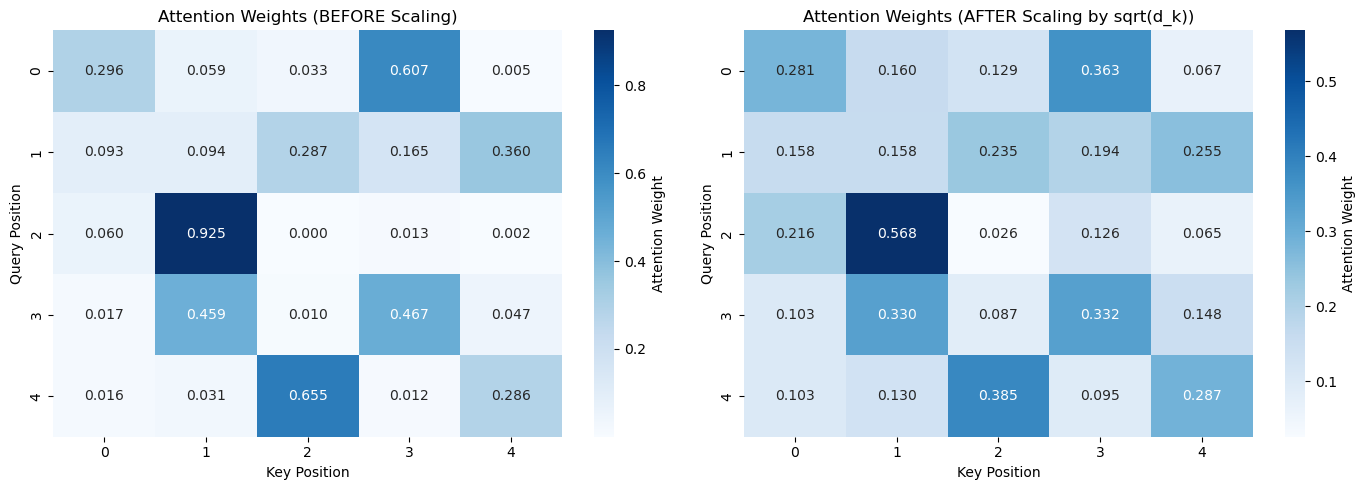


Comparison:
Unscaled - Max attention weight: 0.9251
Scaled   - Max attention weight: 0.5677

Unscaled - Min attention weight: 0.0002
Scaled   - Min attention weight: 0.0260


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize attention weights
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Unscaled attention
sns.heatmap(softmax_unscaled[0].detach().numpy(), 
            annot=True, 
            fmt='.3f',
            cmap='Blues',
            ax=axes[0],
            cbar_kws={'label': 'Attention Weight'})
axes[0].set_title('Attention Weights (BEFORE Scaling)')
axes[0].set_xlabel('Key Position')
axes[0].set_ylabel('Query Position')

# Scaled attention
sns.heatmap(softmax_scaled[0].detach().numpy(), 
            annot=True, 
            fmt='.3f',
            cmap='Blues',
            ax=axes[1],
            cbar_kws={'label': 'Attention Weight'})
axes[1].set_title('Attention Weights (AFTER Scaling by sqrt(d_k))')
axes[1].set_xlabel('Key Position')
axes[1].set_ylabel('Query Position')

plt.tight_layout()
plt.show()

print("\nComparison:")
print(f"Unscaled - Max attention weight: {softmax_unscaled[0].max().item():.4f}")
print(f"Scaled   - Max attention weight: {softmax_scaled[0].max().item():.4f}")
print(f"\nUnscaled - Min attention weight: {softmax_unscaled[0].min().item():.4f}")
print(f"Scaled   - Min attention weight: {softmax_scaled[0].min().item():.4f}")


## Step 6: Test with Different Dimensions


In [ ]:
# Test with different d_k values to show the effect of scaling
d_k_values = [4, 8, 16, 32, 64]
max_attention_weights = []

for d_k_test in d_k_values:
    Q_test = torch.randn(1, seq_len, d_k_test)
    K_test = torch.randn(1, seq_len, d_k_test)
    V_test = torch.randn(1, seq_len, d_v)
    
    # Without scaling
    scores_unscaled_test = torch.matmul(Q_test, K_test.transpose(-2, -1))
    softmax_unscaled_test = F.softmax(scores_unscaled_test, dim=-1)
    
    # With scaling
    scores_scaled_test = scores_unscaled_test / np.sqrt(d_k_test)
    softmax_scaled_test = F.softmax(scores_scaled_test, dim=-1)
    
    max_attention_weights.append({
        'd_k': d_k_test,
        'unscaled_max': softmax_unscaled_test.max().item(),
        'scaled_max': softmax_scaled_test.max().item(),
        'unscaled_entropy': -torch.sum(softmax_unscaled_test * torch.log(softmax_unscaled_test + 1e-9), dim=-1).mean().item(),
        'scaled_entropy': -torch.sum(softmax_scaled_test * torch.log(softmax_scaled_test + 1e-9), dim=-1).mean().item()
    })

print("Effect of Scaling Across Different d_k Values:")
print("=" * 70)
print(f"{'d_k':<8} {'Unscaled Max':<15} {'Scaled Max':<15} {'Unscaled Entropy':<18} {'Scaled Entropy':<15}")
print("-" * 70)
for result in max_attention_weights:
    print(f"{result['d_k']:<8} {result['unscaled_max']:<15.4f} {result['scaled_max']:<15.4f} "
          f"{result['unscaled_entropy']:<18.4f} {result['scaled_entropy']:<15.4f}")

print("\nNote: Higher entropy = more distributed attention (less peaked)")
print("      Lower entropy = more focused attention (more peaked)")


Effect of Scaling Across Different d_k Values:
d_k      Unscaled Max    Scaled Max      Unscaled Entropy   Scaled Entropy 
----------------------------------------------------------------------
4        0.6901          0.4820          1.1194             1.4086         
8        0.9404          0.5318          0.7591             1.3617         
16       0.9781          0.5319          0.6154             1.3452         
32       1.0000          0.7133          0.3365             1.2468         
64       0.9967          0.4838          0.2416             1.4124         

Note: Higher entropy = more distributed attention (less peaked)
      Lower entropy = more focused attention (more peaked)
